In [10]:
import pandas as pd

In [12]:
dataset = pd.read_csv(r"C:\Users\sudhi\Downloads\EGFR_06_bioactivity_data_3class_pIC50_pubchem_fp.csv")
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.387216
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.769551
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.031517
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.301030
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.522879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10069,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.698970
10070,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
10071,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
10072,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000


In [13]:
X = dataset.drop(['pIC50'], axis=1)

Y = dataset.iloc[:, -1]

X.head(), Y.head()

(   PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
 0           1           1           0           0           0           0   
 1           1           1           1           0           0           0   
 2           1           1           0           0           0           0   
 3           1           1           0           0           0           0   
 4           1           1           1           0           0           0   
 
    PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  ...  PubchemFP871  \
 0           0           0           0           1  ...             0   
 1           0           0           0           1  ...             0   
 2           0           0           0           1  ...             0   
 3           0           0           0           1  ...             0   
 4           0           0           0           1  ...             0   
 
    PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  \
 0            

In [14]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X.head()

,PubchemFP2,PubchemFP3,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP33,PubchemFP37,PubchemFP43,PubchemFP143,...,PubchemFP784,PubchemFP791,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP805,PubchemFP813,PubchemFP821,PubchemFP824,PubchemFP826
0,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1,1,0,1,1,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = DecisionTreeRegressor(random_state=42)

model.fit(X, Y)

r2 = model.score(X, Y)
Y_pred = model.predict(X)

print('Mean squared error (MSE): %.2f' % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.11
Coefficient of determination (R^2): 0.95


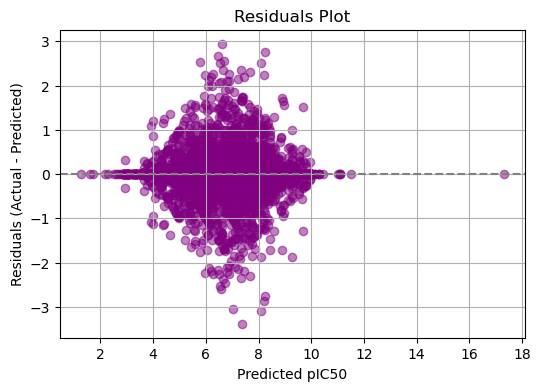

In [19]:
import matplotlib.pyplot as plt
residuals = Y - Y_pred

plt.figure(figsize=(6, 4))
plt.scatter(Y_pred, residuals, alpha=0.5, color='purple')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("Predicted pIC50")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot")
plt.grid(True)
plt.show()

R² Score: 0.95


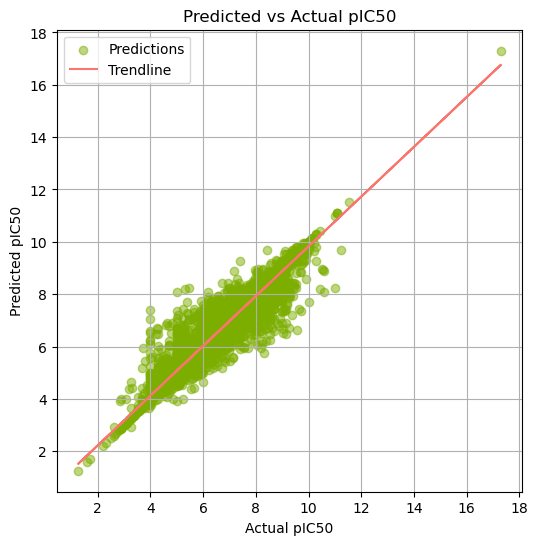

In [21]:
import numpy as np
from sklearn.metrics import r2_score

Y_pred = model.predict(X)

r2 = r2_score(Y, Y_pred)
print('R² Score: %.2f' % r2)

plt.figure(figsize=(6, 6))
plt.scatter(Y, Y_pred, c="#7CAE00", alpha=0.5, label="Predictions")
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)
plt.plot(Y, p(Y), "#F8766D", label="Trendline")
plt.xlabel('Actual pIC50')
plt.ylabel('Predicted pIC50')
plt.title('Predicted vs Actual pIC50')
plt.legend()
plt.grid(True)
plt.show()

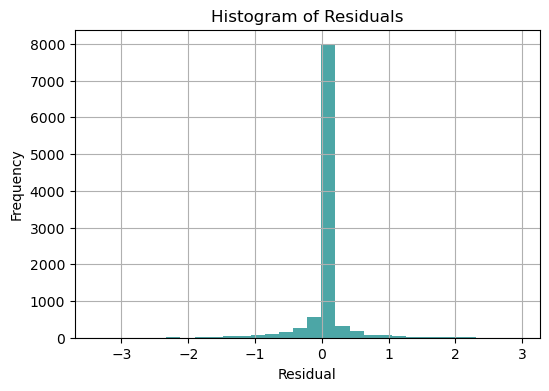

In [23]:
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30, color='teal', alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()